#####                              IMDb Movie Assignment

##### PROBLEM STATEMENT:
    To find interesting insights like top 10 profiting movies  from list of movies released between 1916 and 2016 using python.

In [21]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

###### Reading the source and Inspection



In [23]:
#Import and read the movie database. Store it in a dataframe called `movies`.
movies = pd.read_csv("./Movie+Assignment+Data.csv")
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


###### Inspect the dataframe



In [24]:
# Checking the columnwise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [25]:
#Display all the column headings
movies.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [26]:
# Check the number of rows and columns in the dataframe
movies.shape

(5043, 28)

In [27]:
# Get a summary of the dataframe using 'describe()' - statistical summary for numerical columns only

movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


###### Cleaning the Data



In [28]:
# Finding number of Null values in all the columns  
movies.isnull().sum() 

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [29]:
# Finding number of Null values in all the rows-passing axis=1 in sum() indicates that we want to findout null values in each row
movies.isnull().sum(axis=1) 

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [30]:
# Code to represent the null values in each column in percentage with two decimals
round((movies.isnull().sum()*100/len(movies)),2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

###### Drop unecessary columns



We are mostly focused on analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So will drop those not required columns:
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [31]:
# Code for dropping the columns 
movies=movies.drop(columns=['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'])


In [32]:
#Check the number of rows and columns in the dataframe after dropping the columns
movies.shape

(5043, 13)

###### Drop unecessary rows using columns with high Null percentages



In [33]:
#Columns having null values(greater than 5%) are dropped.There are two such columns-gross and budget

movies = movies[~np.isnan(movies['gross'])]
movies = movies[~np.isnan(movies['budget'])]


In [35]:
# Code to represent the null values in each column in percentage with two decimals
round((movies.isnull().sum(axis=0)*100/len(movies)),2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

###### Fill NaN values



In [36]:
# Inspect the language column of the dataset-found that top language is English

movies['language'].describe()

count        3888
unique         38
top       English
freq         3707
Name: language, dtype: object

In [37]:
# Replace all the missing values with `'English' using replace() function.inplace=True means
#the dataset will be updated directly with the changes
movies.language.replace(np.NaN, 'English', inplace=True)


In [38]:
# Inspecting the percentages of NaNs

round(100*(movies.isnull().sum()/len(movies.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

###### Check the number of retained rows



In [39]:
# Write your code for checking number of retained rows here
movies.shape


(3891, 13)

In [41]:
# Get the percentage of retained rows by dividing the current number of rows with initial number of rows
round((len(movies)*100/5043),2)

77.16

###### Data Analysis




In [42]:
# Convert the unit of the `budget` and `gross` columns from `$` to `million $`.
movies['gross']=movies['gross']/1000000
movies['budget']=movies['budget']/1000000
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000


###### Now the objective is to Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [44]:
# Creating a new column - profit 
movies['profit']=movies['gross'] - movies['budget']
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0000,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0000,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0000,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0000,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7000,2012.0,6.6,24000,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,0.0070,2004.0,7.0,19000,0.417760
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,0.0070,2005.0,6.3,74,0.063071
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0070,1992.0,6.9,0,2.033920
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,0.0090,2011.0,6.4,413,-0.004416


In [45]:
# Sorting the dataframe based on profit column in descending order using sort_values() function
movies=movies.sort_values('profit',ascending=False)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.000000,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.000000,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.000000,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.000000,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.500000,1982.0,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,2127.519898,2004.0,6.9,973,-2127.109510
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
3005,Lajos Koltai,73.0,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,2500.000000,2005.0,7.1,607,-2499.804112
3859,Chan-wook Park,202.0,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131.0,Korean,4200.000000,2005.0,7.7,4000,-4199.788333


In [46]:
# Write code for profit vs budget plot here
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot('budget', 'profit', movies)
plt.show()


<Figure size 600x600 with 3 Axes>

In [47]:
top10 = movies.head(10)# Write your code to get the top 10 profiting movies here
top10


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [71]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(subset=None,keep='first',inplace=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237.000000,2009.0,936.0,7.9,1.78,33000,523.505847
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652.177271,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,150.000000,2015.0,2000.0,7.0,2.00,150000,502.177271
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658.672302,Drama|Romance,...,English,USA,PG-13,200.000000,1997.0,14000.0,7.7,2.35,26000,458.672302
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,11.000000,1977.0,1000.0,8.7,2.35,33000,449.935665
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434.949459,Family|Sci-Fi,...,English,USA,PG,10.500000,1982.0,725.0,7.9,1.85,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,Japanese,Japan,PG-13,2127.519898,2004.0,336.0,6.9,1.85,973,-2127.109510
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2.298191,Adventure|Animation|Fantasy,...,Japanese,Japan,PG-13,2400.000000,1997.0,851.0,8.4,1.85,11000,-2397.701809
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,0.195888,Drama|Romance|War,...,Hungarian,Hungary,R,2500.000000,2005.0,2.0,7.1,2.35,607,-2499.804112
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,0.211667,Crime|Drama,...,Korean,South Korea,R,4200.000000,2005.0,126.0,7.7,2.35,4000,-4199.788333


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 2988
Data columns (total 29 columns):
color                        3889 non-null object
director_name                3891 non-null object
num_critic_for_reviews       3890 non-null float64
duration                     3890 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3881 non-null float64
actor_2_name                 3886 non-null object
actor_1_facebook_likes       3888 non-null float64
gross                        3891 non-null float64
genres                       3891 non-null object
actor_1_name                 3888 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
actor_3_name                 3881 non-null object
facenumber_in_poster         3885 non-null float64
plot_keywords                3860 non-null object
movie_imdb_link              3891 non-

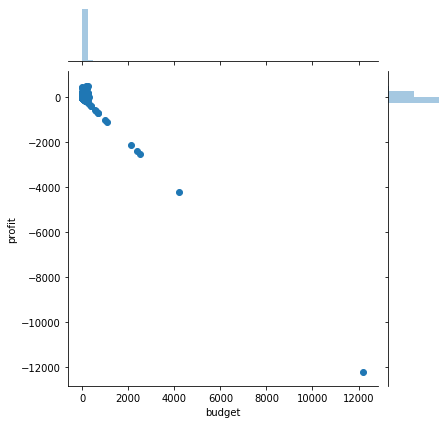

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237.0,2009.0,936.0,7.9,1.78,33000,523.505847
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652.177271,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,150.0,2015.0,2000.0,7.0,2.00,150000,502.177271
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658.672302,Drama|Romance,...,English,USA,PG-13,200.0,1997.0,14000.0,7.7,2.35,26000,458.672302
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,11.0,1977.0,1000.0,8.7,2.35,33000,449.935665
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434.949459,Family|Sci-Fi,...,English,USA,PG,10.5,1982.0,725.0,7.9,1.85,34000,424.449459
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623.279547,Action|Adventure|Sci-Fi,...,English,USA,PG-13,220.0,2012.0,21000.0,8.1,1.85,123000,403.279547
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623.279547,Action|Adventure|Sci-Fi,...,English,USA,PG-13,220.0,2012.0,21000.0,8.1,1.85,123000,403.279547
509,Color,Roger Allers,186.0,73.0,28.0,847.0,Nathan Lane,2000.0,422.783777,Adventure|Animation|Drama|Family|Musical,...,English,USA,G,45.0,1994.0,886.0,8.5,1.66,17000,377.783777
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,115.0,1999.0,14000.0,6.5,2.35,13000,359.544677
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.316061,Action|Crime|Drama|Thriller,...,English,USA,PG-13,185.0,2008.0,13000.0,9.0,2.35,37000,348.316061


In [72]:
# Write code for repeating subtask 2 here
movies['profit']=movies['gross'] - movies['budget']
movies.info()
movies=movies.sort_values('profit',ascending=False)
sns.jointplot('budget', 'profit', movies)
plt.show()
top10 = movies.head(10)# Write your code to get the top 10 profiting movies here
top10.head(10)

**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [73]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'

movies=movies.sort_values('imdb_score',ascending=False)
movies=movies.loc[(movies.num_voted_users>25000),:]

IMDb_Top_250=movies.head(250)
IMDb_Top_250.insert(0, 'rank', range(0, len(IMDb_Top_250)))
IMDb_Top_250.head()

,rank,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
1937,0,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28.341469,...,English,USA,R,25.0,1994.0,745.0,9.3,1.85,108000,3.341469
3466,1,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134.821952,...,English,USA,R,6.0,1972.0,10000.0,9.2,1.85,43000,128.821952
2837,2,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57.300000,...,English,USA,R,13.0,1974.0,14000.0,9.0,1.85,14000,44.300000
66,3,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.316061,...,English,USA,PG-13,185.0,2008.0,13000.0,9.0,2.35,37000,348.316061
3355,4,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107.930000,...,English,USA,R,8.0,1994.0,902.0,8.9,2.35,45000,99.930000


In [74]:
Top_Foreign_Lang_Film =IMDb_Top_250.loc[IMDb_Top_250.language != 'English'] # Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film.head()



,rank,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4498,7,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6.100000,...,Italian,Italy,Approved,1.2,1966.0,34.0,8.9,2.35,20000,4.900000
4747,16,Black and White,Akira Kurosawa,153.0,202.0,0.0,4.0,Minoru Chiaki,304.0,0.269061,...,Japanese,Japan,Unrated,2.0,1954.0,8.0,8.7,1.37,11000,-1.730939
4029,17,Color,Fernando Meirelles,214.0,135.0,353.0,40.0,Seu Jorge,1000.0,7.563397,...,Portuguese,Brazil,R,3.3,2002.0,69.0,8.7,1.85,28000,4.263397
2373,22,Color,Hayao Miyazaki,246.0,125.0,6000.0,7.0,Ryûnosuke Kamiki,17.0,10.049886,...,Japanese,Japan,PG,19.0,2001.0,10.0,8.6,1.85,28000,-8.950114
4259,29,Color,Florian Henckel von Donnersmarck,215.0,137.0,207.0,155.0,Ulrich Mühe,380.0,11.284657,...,German,Germany,R,2.0,2006.0,284.0,8.5,2.35,39000,9.284657


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [86]:
# Write your code for extracting the top 10 directors here
top10director=movies.pivot_table(values='imdb_score',index='director_name',aggfunc='mean').sort_values(['imdb_score','director_name'],ascending=[False,True]).head(10)
top10director.head()


,imdb_score
director_name,
Akira Kurosawa,8.7
Charles Chaplin,8.6
Tony Kaye,8.6
Alfred Hitchcock,8.5
Damien Chazelle,8.5


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [195]:
# Write your code for extracting the first two genres of each movie here
movies['genre_1']=movies.genres.str.split("|").str[0]
movies.head()
movies['genre_2']=movies.genres.str.split("|").str[1]
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,decade,genre_1,genre_2
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28.3,Crime|Drama,...,25.0,1994.0,745.0,9.3,1.9,108000,3.3,1990.0,Crime,Drama
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134.8,Crime|Drama,...,6.0,1972.0,10000.0,9.2,1.9,43000,128.8,1970.0,Crime,Drama
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57.3,Crime|Drama,...,13.0,1974.0,14000.0,9.0,1.9,14000,44.3,1970.0,Crime,Drama
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.3,Action|Crime|Drama|Thriller,...,185.0,2008.0,13000.0,9.0,2.4,37000,348.3,2000.0,Action,Crime
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107.9,Crime|Drama,...,8.0,1994.0,902.0,8.9,2.4,45000,99.9,1990.0,Crime,Drama


In [196]:
movies_by_segment = movies.groupby(['genre_1','genre_2'],as_index=False)# Write your code for grouping the dataframe here
movies_by_segment.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,decade,genre_1,genre_2
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28.3,Crime|Drama,...,25.0,1994.0,745.0,9.3,1.9,108000,3.3,1990.0,Crime,Drama
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134.8,Crime|Drama,...,6.0,1972.0,10000.0,9.2,1.9,43000,128.8,1970.0,Crime,Drama
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57.3,Crime|Drama,...,13.0,1974.0,14000.0,9.0,1.9,14000,44.3,1970.0,Crime,Drama
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.3,Action|Crime|Drama|Thriller,...,185.0,2008.0,13000.0,9.0,2.4,37000,348.3,2000.0,Action,Crime
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107.9,Crime|Drama,...,8.0,1994.0,902.0,8.9,2.4,45000,99.9,1990.0,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,Color,Bruce Hunt,140.0,93.0,2.0,258.0,Cole Hauser,849.0,14.9,Adventure|Horror|Thriller,...,30.0,2005.0,787.0,5.1,2.4,0,-15.1,2000.0,Adventure,Horror
2823,Color,Steve Pink,107.0,99.0,38.0,390.0,Gillian Jacobs,3000.0,12.3,Comedy|Sci-Fi,...,14.0,2015.0,837.0,5.1,1.9,0,-1.7,2010.0,Comedy,Sci-Fi
2087,Color,Luke Greenfield,75.0,84.0,42.0,182.0,Michael Papajohn,436.0,55.8,Comedy|Sci-Fi,...,22.0,2001.0,241.0,4.8,1.9,1000,33.8,2000.0,Comedy,Sci-Fi
2066,Color,Joseph Sargent,80.0,92.0,114.0,434.0,Mario Van Peebles,912.0,20.8,Adventure|Horror|Thriller,...,23.0,1987.0,535.0,2.8,2.4,0,-2.2,1980.0,Adventure,Horror


In [198]:
PopGenre = movies['gross'].mean().sort_values(ascending=False)# Write your code for getting the 5 most popular combo of genres here
PopGenre.head(5)


AttributeError: 'float' object has no attribute 'sort_values'

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [92]:
# Write your code for creating three new dataframes here

Meryl_Streep = movies.loc[movies.actor_1_name=='Meryl Streep']# Include all movies in which Meryl_Streep is the lead
Meryl_Streep.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
1925,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41.597830,Drama|Romance,...,English,USA,PG-13,25.0,2002.0,577.0,7.6,1.85,0,16.597830
1575,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87.100000,Biography|Drama|Romance,...,English,USA,PG,31.0,1985.0,920.0,7.2,1.85,0,56.100000
1204,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94.125426,Biography|Drama|Romance,...,English,USA,PG-13,40.0,2009.0,935.0,7.0,1.85,13000,54.125426
1408,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124.732962,Comedy|Drama|Romance,...,English,USA,PG-13,35.0,2006.0,11000.0,6.8,2.35,0,89.732962
410,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112.703470,Comedy|Drama|Romance,...,English,USA,R,85.0,2009.0,2000.0,6.6,1.85,0,27.703470


In [94]:
Leo_Caprio =movies.loc[movies.actor_1_name=='Leonardo DiCaprio'] # Include all movies in which Leo_Caprio is the lead
Leo_Caprio.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
97,Color,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,292.568851,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,160.0,2010.0,27000.0,8.8,2.35,175000,132.568851
361,Color,Martin Scorsese,352.0,151.0,17000.0,1000.0,Matt Damon,29000.0,132.373442,Crime|Drama|Thriller,...,English,USA,R,90.0,2006.0,13000.0,8.5,2.35,29000,42.373442
296,Color,Quentin Tarantino,765.0,165.0,16000.0,265.0,Christoph Waltz,29000.0,162.804648,Drama|Western,...,English,USA,R,100.0,2012.0,11000.0,8.5,2.35,199000,62.804648
308,Color,Martin Scorsese,606.0,240.0,17000.0,4000.0,Matthew McConaughey,29000.0,116.866727,Biography|Comedy|Crime|Drama,...,English,USA,R,100.0,2013.0,11000.0,8.2,2.35,138000,16.866727
452,Color,Martin Scorsese,490.0,138.0,17000.0,163.0,Joseph Sikora,29000.0,127.968405,Mystery|Thriller,...,English,USA,R,80.0,2010.0,223.0,8.1,2.35,53000,47.968405


In [95]:
Brad_Pitt =movies.loc[movies.actor_1_name=='Brad Pitt'] # Include all movies in which Brad_Pitt is the lead
Brad_Pitt.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
683,Color,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000.0,37.023395,Drama,...,English,USA,R,63.0,1999.0,783.0,8.8,2.35,48000,-25.976605
2898,Color,Tony Scott,122.0,121.0,12000.0,975.0,Gary Oldman,11000.0,12.281500,Action|Crime|Drama|Romance|Thriller,...,English,USA,R,13.0,1993.0,10000.0,8.0,2.35,15000,-0.718500
400,Color,Steven Soderbergh,186.0,116.0,0.0,471.0,Bernie Mac,11000.0,183.405771,Crime|Thriller,...,English,USA,PG-13,85.0,2001.0,1000.0,7.8,2.35,0,98.405771
101,Color,David Fincher,362.0,166.0,21000.0,919.0,Jason Flemyng,11000.0,127.490802,Drama|Fantasy|Romance,...,English,USA,PG-13,150.0,2008.0,1000.0,7.8,2.35,23000,-22.509198
940,Color,Neil Jordan,120.0,123.0,277.0,4000.0,Tom Cruise,11000.0,105.264608,Drama|Fantasy|Horror,...,English,USA,R,60.0,1994.0,10000.0,7.6,1.85,11000,45.264608


In [96]:
# Write your code for combining the three dataframes here
combined=pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt],axis=0)
combined.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
1925,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41.597830,Drama|Romance,...,English,USA,PG-13,25.0,2002.0,577.0,7.6,1.85,0,16.597830
1575,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87.100000,Biography|Drama|Romance,...,English,USA,PG,31.0,1985.0,920.0,7.2,1.85,0,56.100000
1204,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94.125426,Biography|Drama|Romance,...,English,USA,PG-13,40.0,2009.0,935.0,7.0,1.85,13000,54.125426
1408,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124.732962,Comedy|Drama|Romance,...,English,USA,PG-13,35.0,2006.0,11000.0,6.8,2.35,0,89.732962
410,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112.703470,Comedy|Drama|Romance,...,English,USA,R,85.0,2009.0,2000.0,6.6,1.85,0,27.703470


In [184]:
# Write your code for grouping the combined dataframe here
df=combined.groupby('actor_1_name',axis=0)
##df.head()

In [185]:
# Write the code for finding the mean of critic reviews and audience reviews here

critic=df['num_critic_for_reviews'].mean().sort_values(ascending=False)
critic.head()
user=df['num_user_for_reviews'].mean().sort_values(ascending=False)
user.head()


actor_1_name
Leonardo DiCaprio    956.6
Brad Pitt            784.9
Meryl Streep         319.7
Name: num_user_for_reviews, dtype: float64

**Checkpoint 6:** `Leonardo` has aced both the lists!

In [161]:
# Write the code for calculating decade here

movies['decade']=(movies['title_year']//10)*10

movies.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,decade
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28.3,Crime|Drama,...,USA,R,25.0,1994.0,745.0,9.3,1.9,108000,3.3,1990.0
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134.8,Crime|Drama,...,USA,R,6.0,1972.0,10000.0,9.2,1.9,43000,128.8,1970.0
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57.3,Crime|Drama,...,USA,R,13.0,1974.0,14000.0,9.0,1.9,14000,44.3,1970.0
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.3,Action|Crime|Drama|Thriller,...,USA,PG-13,185.0,2008.0,13000.0,9.0,2.4,37000,348.3,2000.0
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107.9,Crime|Drama,...,USA,R,8.0,1994.0,902.0,8.9,2.4,45000,99.9,1990.0


In [173]:
# Write your code for creating the data frame df_by_decade here 
#movies['decade'].sort_values(ascending=False)
#df_by_decade=movies.pivot_table(values='num_voted_users',index='decade',aggfunc='sum')
df_by_decade=movies.groupby('decade')
df_by_decade.head()
#df_by_decade.info()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,decade
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,2.8e+01,Crime|Drama,...,USA,R,25.0,1994.0,745.0,9.3,1.9,108000,3.3,1990.0
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,1.3e+02,Crime|Drama,...,USA,R,6.0,1972.0,10000.0,9.2,1.9,43000,128.8,1970.0
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,5.7e+01,Crime|Drama,...,USA,R,13.0,1974.0,14000.0,9.0,1.9,14000,44.3,1970.0
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,5.3e+02,Action|Crime|Drama|Thriller,...,USA,PG-13,185.0,2008.0,13000.0,9.0,2.4,37000,348.3,2000.0
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,1.1e+02,Crime|Drama,...,USA,R,8.0,1994.0,902.0,8.9,2.4,45000,99.9,1990.0
1874,Black and White,Steven Spielberg,174.0,185.0,14000.0,212.0,Embeth Davidtz,14000.0,9.6e+01,Biography|Drama|History,...,USA,R,22.0,1993.0,795.0,8.9,1.9,41000,74.1,1990.0
339,Color,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,3.8e+02,Action|Adventure|Drama|Fantasy,...,USA,PG-13,94.0,2003.0,857.0,8.9,2.4,16000,283.0,2000.0
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6.1e+00,Western,...,Italy,Approved,1.2,1966.0,34.0,8.9,2.4,20000,4.9,1960.0
97,Color,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,2.9e+02,Action|Adventure|Sci-Fi|Thriller,...,USA,PG-13,160.0,2010.0,27000.0,8.8,2.4,175000,132.6,2010.0
683,Color,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000.0,3.7e+01,Drama,...,USA,R,63.0,1999.0,783.0,8.8,2.4,48000,-26.0,1990.0


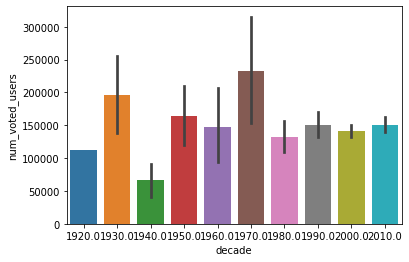

In [187]:
# Write your code for plotting number of voted users vs decade
#df_by_decade['decade']=pd.to_numeric(df_by_decade['decade'])
sns.barplot(x='decade', y='num_voted_users', data=movies)
plt.show()